# Notebook to explore dataset generation based on various different variables that include differing probabilities and probability distributions. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## normal/gaussian


In [2]:
normal = lambda x: ((1/np.sqrt(2*np.pi))*(np.exp(-0.5*(x)**2)))
gaussian = lambda x,sd,mean: ((1/np.sqrt(2*np.pi*(sd**2)))*np.exp(-((x-mean)**2)/(2*(sd**2))))

In [3]:
number_points = 100
xdata = np.linspace(-4, 4, number_points)

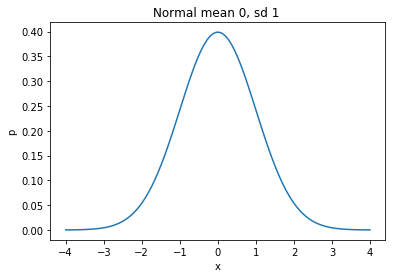

In [4]:

fig, ax = plt.subplots()
plt.title('Normal mean 0, sd 1 ')
plt.xlabel('x')
plt.ylabel('p')
ax.plot(xdata, normal(xdata))
plt.show()

In [5]:
number_points = 200
xdata = np.linspace(-5, 5, number_points)

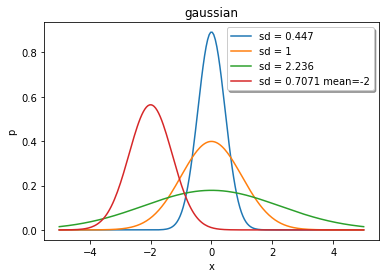

In [6]:
m = 0
s = [ 0.447,1, 2.236,]
fig, ax = plt.subplots()
plt.title('gaussian')
plt.xlabel('x')
plt.ylabel('p')
for a in s:
    lab = "sd = " + str(a)
    ax.plot(xdata, gaussian(xdata,a,m), label=lab)
lab = "sd = 0.7071 mean=-2"
ax.plot(xdata, gaussian(xdata,0.7071,-2.0), label=lab)
legend = ax.legend(loc='best', shadow=True)
plt.show()

## powerlaw
the powerlaw distribution is commonly found in actual network attributes

In [7]:
powerlaw = lambda x, amp, alpha: amp * (x**-alpha)

In [8]:
number_points = 200
xdata = np.linspace(1, 800, number_points)
amplitude = 500

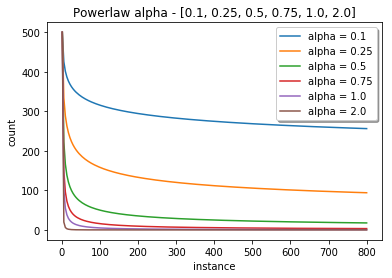

In [9]:
r = [0.1,0.25,0.5,0.75,1.0,2.0 ]
fig, ax = plt.subplots()
plt.title('Powerlaw alpha - '+str(r))
plt.xlabel('instance')
plt.ylabel('count')
for a in r:
    lab = "alpha = " + str(a)
    ax.plot(xdata, powerlaw(xdata, amplitude, a), label=lab)
legend = ax.legend(loc='best', shadow=True)
plt.show()

In [10]:
ydata=powerlaw(xdata, amplitude, 0.1)

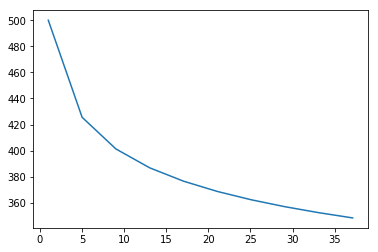

In [11]:
yi = [y for y in powerlaw(xdata, amplitude, 0.1)[0:10]]
xi = [x for x in xdata[0:10]]
plt.plot(xi,yi)
plt.show()

In [12]:
number_points = 400
xdata = np.linspace(-2, 2, number_points)

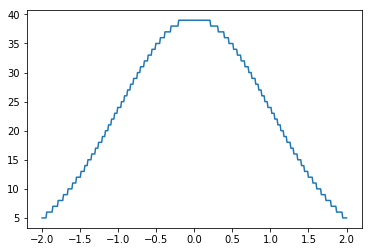

In [13]:
plt.plot(xdata,[int(y*100) for y in normal(xdata)])
plt.show()

generate an array slice of the gaussian of a dataset 

In [14]:
number_points = 400
xdata = np.linspace(-2, 2, number_points)
#ydata=gaussian(xdata,0.7071,2.0)

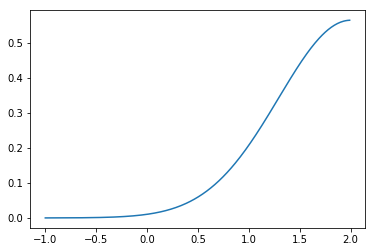

In [15]:
yi = [y for y in gaussian(xdata,0.7071,2.0)[100:399]]
xi = [x for x in xdata[100:399]]
plt.plot(xi,yi)
plt.show()

generate a dict of counts of apps used with a powerlaw

In [16]:
apps = ['o365','sfdc','outlook','google', 'skype','jungledisk']
number_points = len(apps)
xdata = np.linspace(1,len(apps), number_points)
amplitude=1000
yi = [int(y) for y in powerlaw(xdata, amplitude, 0.1)]

In [17]:
t = dict(zip(apps, yi))

In [18]:
l = []
for a in range(len(apps)):
    for n in range (yi[a]):
        l.append(a)
print(len(l))  
ser = pd.Series(data=l,dtype=int)
sam = ser.sample(100)

5384


In [19]:
#[s for _,s in sam.items()]
a = [ apps[i] for _,i in sam.items()]

https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html
generate a series of numbers based on a normal gaussian distribution. is this better than above?
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.power.html?highlight=powerlaw


In [20]:
a = 5. # shape
samples = 1000
s = np.random.power(a, samples)

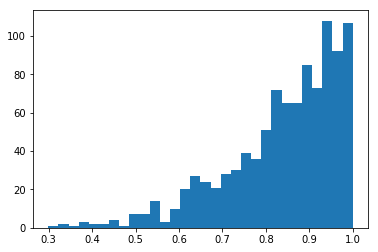

In [21]:

count, bins, ignored = plt.hist(s, bins=30)
x = np.linspace(0, 1, 100)
y = a*x**(a-1.)
normed_y = samples*np.diff(bins)[0]*y
#plt.plot(x, normed_y)
plt.show()